## Part II. NYS Employment Data and PPP Analysis by Industry Sectors

##### Outline
##### 2.1 NYS Total NonFarm Payroll Data
##### 2.2 NYS NonFarm Payroll Data Breakdown by Industry Sectors
##### 2.3 NYS PPP Loan Data

## 2.1 NYS NonFarm Payroll Data

#### 1. Explore the dataset for the total numbers of nonfarm employees.

In [15]:
import matplotlib as mpl
import pandas as pd
dfa=pd.read_csv("2.1 NYS Total Nonfarm.csv") 
dfa.head()

,Supersectors,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Total Nonfarm,1990,8093.3,8121.6,8180.8,8187.7,8283.4,8333.5,8202.8,8206.3,8213.7,8211.4,8211.3,8202.1
1,Total Nonfarm,1991,7841.5,7839.0,7870.3,7879.2,7935.2,7986.8,7833.6,7834.5,7844.3,7886.7,7904.2,7888.7
2,Total Nonfarm,1992,7597.2,7611.6,7648.1,7702.0,7762.2,7803.9,7723.9,7713.6,7726.5,7781.4,7790.7,7807.6
3,Total Nonfarm,1993,7562.9,7598.1,7630.9,7689.5,7772.1,7829.5,7777.3,7762.3,7774.1,7840.6,7870.0,7894.9
4,Total Nonfarm,1994,7604.2,7638.5,7700.8,7759.4,7837.9,7898.2,7827.1,7832.8,7851.2,7927.8,7968.3,7980.1


#### 2. Clean and adjust for missing data.

In [16]:
import numpy as np
dfa=dfa.replace(0,np.NaN)
dfa.tail()

,Supersectors,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
27,Total Nonfarm,2017,9307.1,9396.6,9432.8,9499.7,9583.4,9639.4,9574.2,9552.0,9571.6,9689.3,9737.6,9747.4
28,Total Nonfarm,2018,9409.2,9521.6,9567.8,9633.0,9709.3,9777.4,9702.1,9672.6,9676.1,9819.9,9864.0,9865.3
29,Total Nonfarm,2019,9556.3,9645.3,9698.2,9769.2,9815.1,9865.6,9799.3,9766.6,9772.7,9882.1,9940.0,9925.7
30,Total Nonfarm,2020,9647.2,9727.1,9644.9,7846.3,8047.1,8301.8,8368.6,8530.6,8720.4,8832.4,8865.3,8797.9
31,Total Nonfarm,2021,8583.4,8664.5,8757.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Visualize - general trend across time. 
Calculate the average number of workers for each year between 1990-2021. 
Create visualization using simple line charts and create new dataframe to convert the dataset from table to time serires data with year and month.

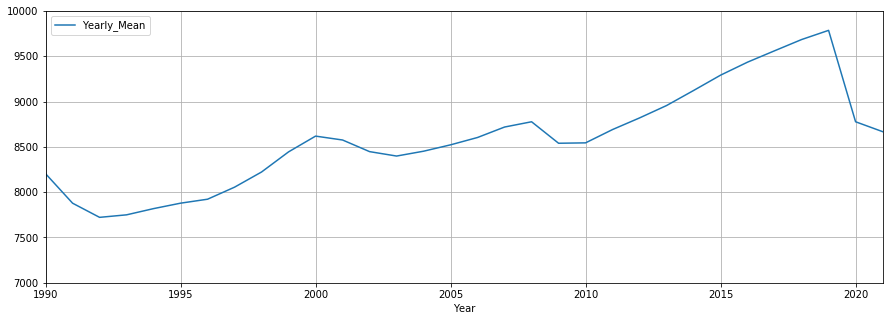

In [17]:
byyear=dfa.replace(0,np.NaN)
byyear['Yearly_Mean'] = byyear.iloc[:, 2:14].mean(axis=1)

ae = byyear.plot.line(subplots=0, x='Year', y='Yearly_Mean',figsize=(15,5),ylim=(7000,10000), grid=1)

In [18]:
dfb = dfa.replace(0,np.NaN)

bytime=pd.DataFrame(columns = ['YearMonth', 'Value','Year'])
#bytime=pd.DataFrame(columns = ['Year','Month', 'Value'])

for i, row in dfb.iterrows():
    for j in range (2,14):
        if row.values[j]!='NaN':
            newrow = {'YearMonth': str(row['Year']) + '-'+ row.index[j], 'Value': row.values[j],'Year':row['Year']}
            #newrow = {'Year': row['Year'],'Month': row.index[j], 'Value': row.values[j]}
            bytime = bytime.append(newrow, ignore_index = True)

bytime = bytime[:-9]
bytime.head()


,YearMonth,Value,Year
0,1990-Jan,8093.3,1990
1,1990-Feb,8121.6,1990
2,1990-Mar,8180.8,1990
3,1990-Apr,8187.7,1990
4,1990-May,8283.4,1990


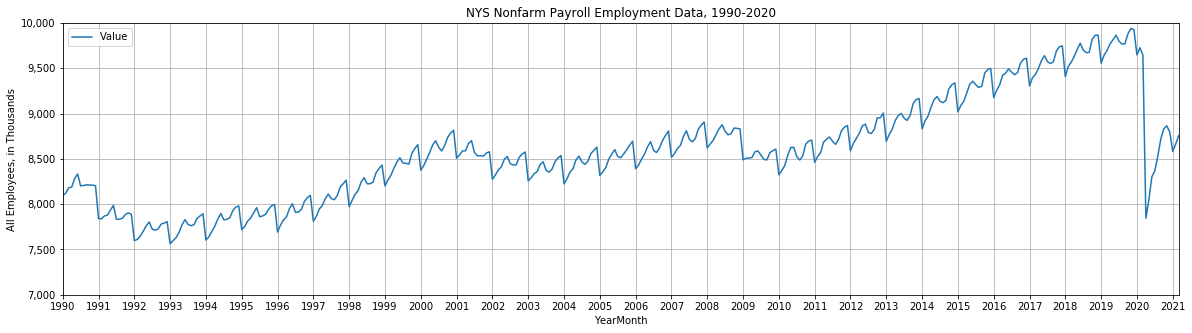

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

af = bytime.plot.line(subplots=0, x='YearMonth', y='Value',figsize=(20,5),ylim=(7000,10000), grid=1)

af.set_title("NYS Nonfarm Payroll Employment Data, 1990-2020")
af.set_xlabel("YearMonth")
af.set_ylabel("All Employees, in Thousands")
af.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#tick_spacing = 12
#af.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
frequency = 12
x_ticks = np.arange(0, 374, frequency)
plt.xticks(x_ticks)

#af.set_xticks(af.get_xticks()[::12])
#my_xticks = np.array(['a','b','c','d','e','f','g','h','i','j','k'])
#plt.xticks(x[::12], my_xticks[::frequency])

af.set_xticklabels(bytime["Year"][::frequency]);

#### 4. Visualize - monthly average.
Calculate the average number of workers for each months over the years 1990-2021. 
Create visualization using overlapping bar chart and line chart.

In [20]:
print(dfa.iloc[0:31].mean().iloc[1:13])

Jan    8422.348387
Feb    8477.161290
Mar    8524.487097
Apr    8521.725806
May    8599.335484
Jun    8648.706452
Jul    8576.432258
Aug    8562.851613
Sep    8592.403226
Oct    8680.874194
Nov    8716.919355
Dec    8733.670968
dtype: float64


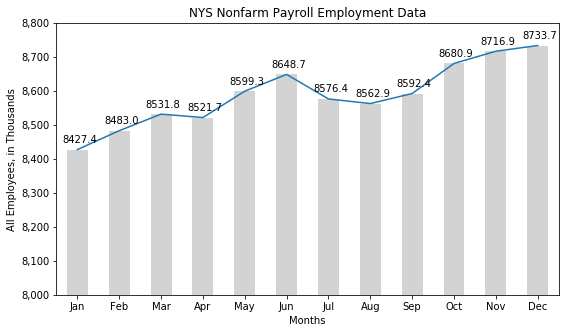

In [21]:
dfa.replace(0,np.NaN).mean().iloc[1:13].plot(kind='line')
ab=dfa.replace(0,np.NaN).mean().iloc[1:13].plot.bar(ylim=(8000,8800),rot=0, color='lightgrey',figsize=(9,5),grid=0)
ab.set_title("NYS Nonfarm Payroll Employment Data")
ab.set_xlabel("Months")
ab.set_ylabel("All Employees, in Thousands")
ab.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

for i in ab.patches:
    ab.annotate(round(i.get_height(),1), (i.get_x()+0.3, i.get_height() + 20),ha='center')

#### 5. Visualize - trend across time separated by months. 

Using the average number of workers for each months over the years 1990-2021 to create more vivid representation of the data. Zooming into the last 5 years, we could clearly see that employment data declined starting slightly in March then declined dramatically for the rest of the year.

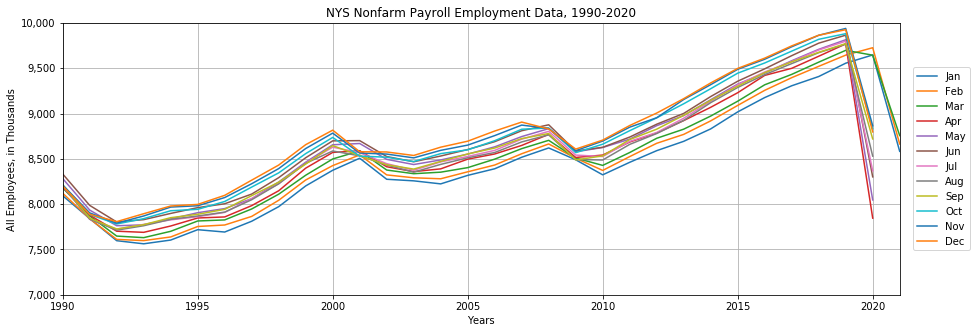

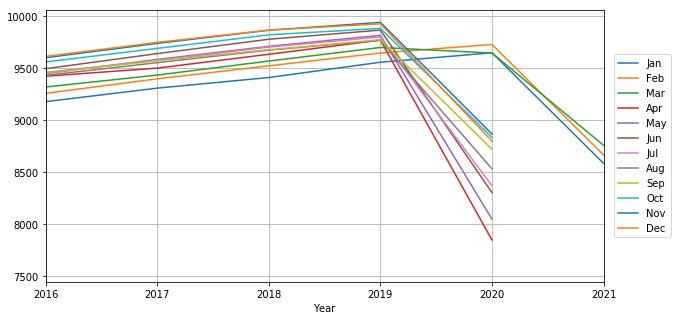

In [22]:
import numpy as np

ac = dfa.replace(0,np.NaN).plot.line(subplots=0, x='Year',figsize=(15,5),ylim=(7000,10000), grid=1)
type(ac)
ac.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

ac.set_title("NYS Nonfarm Payroll Employment Data, 1990-2020")
ac.set_xlabel("Years")
ac.set_ylabel("All Employees, in Thousands")
ac.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ad=dfa.replace(0,np.NaN).plot.line(subplots=0, x='Year',figsize=(10,5),xlim=(2016), grid=1)
ad.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))


## 2.2 NYS NonFarm Payroll Data Breakdown by Industry Sectors

#### 1. Explore the combined industry sectors dataset for the numbers of nonfarm employees.

In [223]:
dfb=pd.read_csv("2.2 NYS Combined Industry Nonfarm 1-11.csv") 
dfb.head()

,Index,Supersectors,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Mining and Logging,1990,6.0,6.0,6.2,6.6,6.9,7.1,7.2,7.2,7.1,7.1,6.9,6.5
1,1,Mining and Logging,1991,5.2,5.1,5.2,5.6,6.0,6.2,6.4,6.1,6.0,6.0,5.8,5.4
2,1,Mining and Logging,1992,4.7,4.7,4.9,5.1,5.6,5.9,5.9,5.9,5.9,5.9,5.8,5.5
3,1,Mining and Logging,1993,4.7,4.8,4.8,5.2,5.6,5.9,6.0,6.1,6.2,6.2,6.1,5.7
4,1,Mining and Logging,1994,4.8,4.8,5.0,5.3,5.8,6.2,6.2,6.3,6.2,6.2,6.1,5.7


#### 2. Clean and adjust for missing data.

In [52]:
import numpy as np
dfb=dfb.replace(0,np.NaN)
#dfb=dfb*1000
dfb
dfb.tail()

,Index,Supersectors,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
347,11,Government,2017,1462.2,1490.3,1494.6,1496.0,1496.6,1491.4,1458.4,1446.2,1464.5,1496.4,1502.5,1503.7
348,11,Government,2018,1460.3,1490.6,1494.6,1493.6,1499.9,1502.3,1462.4,1450.8,1471.2,1498.0,1511.5,1508.4
349,11,Government,2019,1461.9,1490.5,1495.8,1501.8,1503.8,1506.8,1470.0,1460.1,1480.7,1506.4,1525.0,1515.4
350,11,Government,2020,1481.1,1505.4,1509.4,1448.9,1436.0,1429.7,1319.1,1360.1,1457.4,1461.3,1464.3,1449.4
351,11,Government,2021,1415.6,1436.3,1445.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### List of Industry Sectors

In [159]:
sectors=dfb.Supersectors.unique()
for i in sectors:
    print(i)

Mining and Logging
Construction
Manufacturing
Trade, Transportation, and Utilities
Information
Financial Activities
Professional and Business Services
Education and Health Services
Leisure and Hospitality
Other Services
Government


#### 3. Employment Data Graph by Sectors

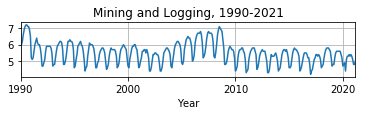

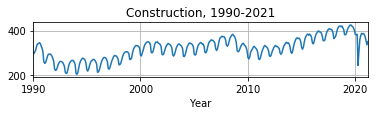

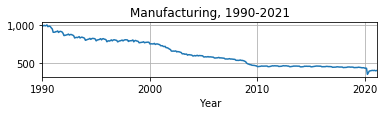

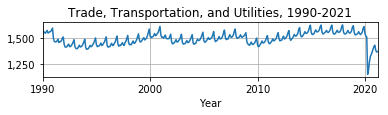

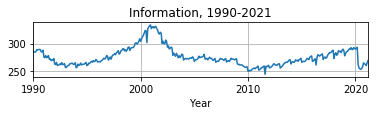

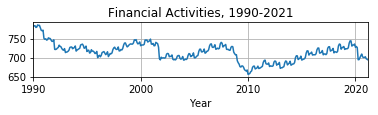

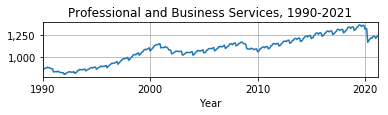

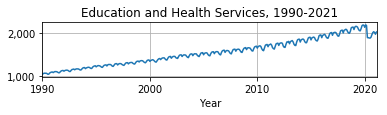

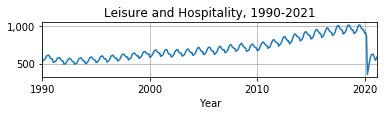

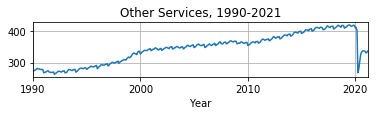

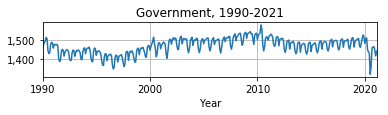

In [222]:
#ax=new.plot.line(x='YearMonth', y='Value', figsize=(15,3),grid=1)

sectors=dfb.Supersectors.unique()

for i in sectors:
    result = dfb.loc[dfb['Supersectors'] == i]
    result = result.replace(0,np.NaN)
    #result = result.iloc[:,3:15].mean(axis=1)
    
    new=pd.DataFrame(columns = ['Year', 'Value'])
    
    for k, row in result.iterrows():
        for j in range (3,15):
            if row.values[j]!='NaN':
                newrow = {'YearMonth': str(row['Year']) + '-'+ row.index[j], 'Value': row.values[j],'Year':row['Year']}
                #newrow = {'Year': row['Year'],'Month': row.index[j], 'Value': row.values[j]}
                new = new.append(newrow, ignore_index = True)
    new = new[:-9]
    #print(i,new)
    ax=new.plot.line(x='YearMonth', y='Value', figsize=(6,1),grid=1)
    ax.set_title(i+", 1990-2021")
    ax.set_xlabel("Year")
    #ax.set_ylabel("Employees, in Thousands")
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend().set_visible(False)

    frequency = 120
    x_ticks = np.arange(0, 374, frequency)
    plt.xticks(x_ticks)
    ax.set_xticklabels(new["Year"][::frequency]);


#### 4. NonFram Employment Graph Sector Average Across the Years, 1990-2021

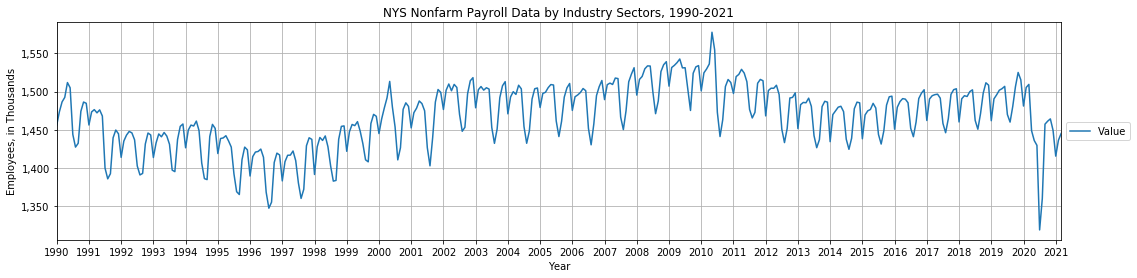

In [221]:
ax=new.plot.line(x='YearMonth', y='Value', figsize=(18,4),grid=1)

ax.set_title("NYS Nonfarm Payroll Data by Industry Sectors, 1990-2021")
ax.set_xlabel("Year")
ax.set_ylabel("Employees, in Thousands")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

frequency = 12
x_ticks = np.arange(0, 374, frequency)
plt.xticks(x_ticks)

ax.set_xticklabels(new["Year"][::frequency]);

#### 5. NonFarm Employment Graph Monthly Average 

In [146]:
mining = dfb.iloc[0:31].mean().iloc[2:14]
mining = mining *1000
print(dfb.iloc[0:31].mean().iloc[2:14])

max(mining)

Jan    4.683871
Feb    4.729032
Mar    4.925806
Apr    5.306452
May    5.693548
Jun    5.877419
Jul    5.948387
Aug    5.961290
Sep    5.916129
Oct    5.890323
Nov    5.732258
Dec    5.377419
dtype: float64


5961.290322580647

<Figure size 432x288 with 0 Axes>

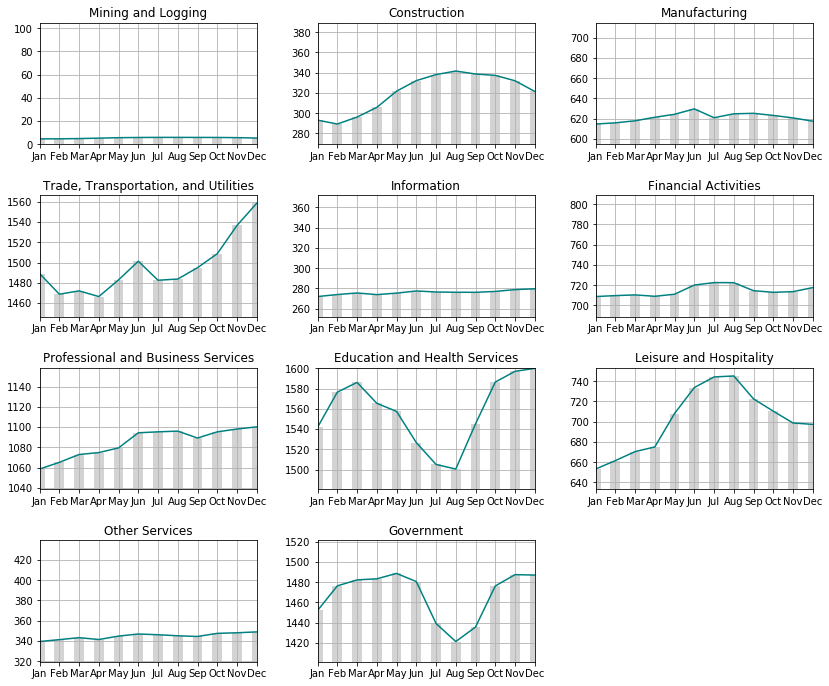

In [226]:
fig = plt.figure()

fig, axes = plt.subplots(nrows=4, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(12)
fig.tight_layout(pad=3.0)

sectors=dfb.Supersectors.unique()
#zz=mining.plot.bar(ylim=(0,10000),rot=0, color='lightgrey',figsize=(15,5),grid=0)

r=0
c=0

for i in sectors:
    result = dfb.loc[dfb['Supersectors'] == i]
    result = result.replace(0,np.NaN)
    result = result.mean().iloc[2:14]
    name=i
    #print(i)
    #print(result)
    #result.plot(ax=axes[r,c])
    result.plot.bar(ax=axes[r,c],rot=0,color='lightgrey',ylim=(max(min(result)-20,0),min(result)+100))
    axes[r,c].set_title(name)
    result.plot(ax=axes[r,c],grid=1,color ='teal')
    #ax=result.plot.bar(ylim=(0,10000),rot=0, color='lightgrey',figsize=(15,5),grid=0)
    if c<2:
        c+=1
        #print(r,c)
    else: 
        r+=1
        c=0

#mining.plot(ax=axes[0,0]); axes[0,0].set_title(a)
#mining.plot(ax=axes[0,1]); axes[0,1].set_title('2')
#mining.plot(ax=axes[0,2]); axes[0,0].set_title(a)

#mining.plot(ax=axes[1,0]); axes[1,0].set_title('3')
#mining.plot(ax=axes[1,1]); axes[1,1].set_title('4')
#mining.plot(ax=axes[1,2]); axes[1,1].set_title('4')

axes[3,2].set_visible(False)



## 2.3 NYS PPP Loan Data

This section analyzes the PPP Loan distribution data by US sectors and compares it to the NonFarm employment data by sectors.

In [279]:
dfc=pd.read_csv("2.3 NYS PPP Data by Sectors.csv") 
dfc.head()

,Rank,No,Supersector,NAICS,Industry,Number of Loans,Share of Loans,Value of Loans,Share of Value,Average Loan
0,1,7,Professional and Business Services,54,"Professional, Scientific, and Technical Services",70112,14%,7044158918,14%,100470
1,2,8,Education and Health Services,62,Health Care and Social Assistance,49247,10%,6774903674,13%,137570
2,3,2,Construction,23,Construction,40649,8%,6069393316,12%,149312
3,4,9,Leisure and Hospitality,72,Accommodation and Food Services,44529,9%,5518347641,11%,123927
4,5,3,Manufacturing,31,Manufacturing,19292,4%,3791703594,7%,196543


In [254]:
n=dfc['Value of Loans'].sum()
print("$", '{:0,.0f}'.format(n))

$ 50,959,302,727


In [313]:
c=dfc.groupby(['Supersector'])['Value of Loans'].sum()
c

Supersector
Construction                            6069393316
Education and Health Services           8344644862
Financial Activities                    2622810696
Government                               178242038
Information                             1181579633
Leisure and Hospitality                 6647685915
Manufacturing                           3791703594
Natural Resources and Mining             339755140
Other Services                          3091409069
Professional and Business Services      9627431128
Trade, Transportation, and Utilities    7802925369
Unclassified                            1261721967
Name: Value of Loans, dtype: int64

Text(0.5, 1.0, 'Number of PPP Loans Distributed')

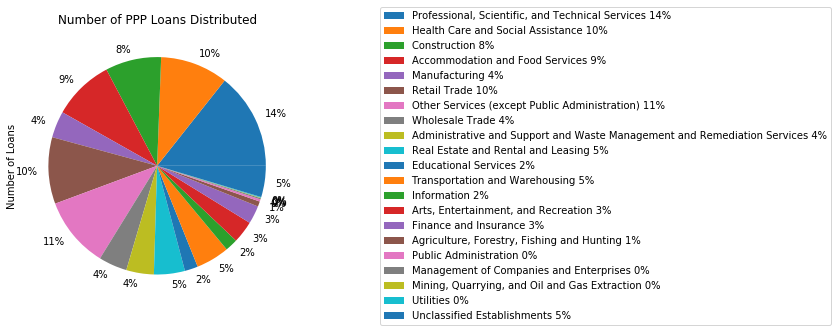

In [332]:
ad = dfc.plot.pie(x='Supersector',y='Number of Loans', figsize=(5, 5), labels= dfc['Share of Loans'])
#autopct='%1.1f%%'

ad.legend(loc='center left', bbox_to_anchor=(1.3, 0.5), labels=(dfc['Industry']+' '+ dfc['Share of Loans']))
ad.set_title("Number of PPP Loans Distributed")

Text(0.5, 1.0, 'Value of PPP Loans Distributed')

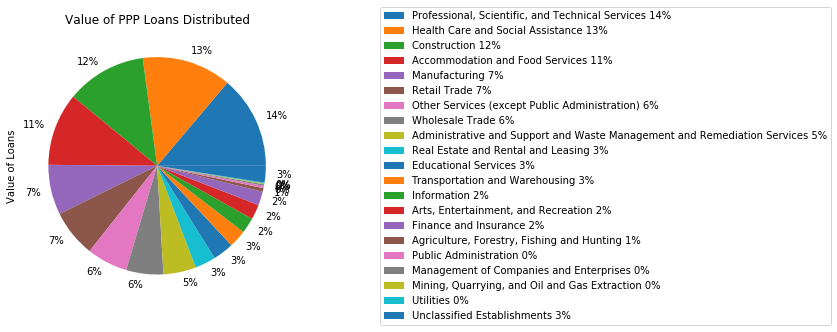

In [333]:
ad = dfc.plot.pie(x='Supersector',y='Value of Loans', figsize=(5, 5), labels= dfc['Share of Value'])
#autopct='%1.1f%%'

ad.legend(loc='center left', bbox_to_anchor=(1.3, 0.5), labels=(dfc['Industry']+' '+ dfc['Share of Value']))
ad.set_title("Value of PPP Loans Distributed")


Text(0.5, 1.0, 'Number of PPP Loans Distributed')

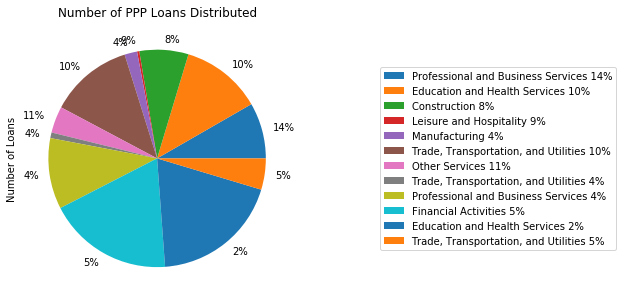

In [334]:
dfd=pd.read_csv("2.3.1 NYS PPP Data by Sectors.csv") 

af = dfd.plot.pie(x='Supersector', y='Number of Loans', figsize=(5, 5),labels= dfc['Share of Loans'])
#autopct='%1.1f%%'

af.legend(loc='center left', bbox_to_anchor=(1.30, 0.5), labels=(dfc['Supersector']+' '+ dfc['Share of Loans']))
af.set_title("Number of PPP Loans Distributed")

Text(0.5, 1.0, 'Value of PPP Loans Distributed')

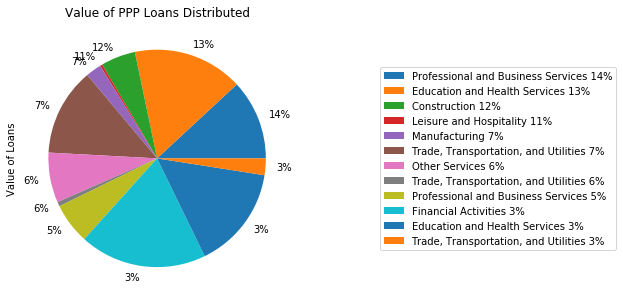

In [336]:
dfd=pd.read_csv("2.3.1 NYS PPP Data by Sectors.csv") 

ag = dfd.plot.pie(x='Supersector', y='Value of Loans', figsize=(5, 5),labels= dfc['Share of Value'])
#autopct='%1.1f%%'

ag.legend(loc='center left', bbox_to_anchor=(1.30, 0.5), labels=(dfc['Supersector']+' '+ dfc['Share of Value']))
ag.set_title("Value of PPP Loans Distributed")